## PROTEUS2 protein secondary structure analysis:

### This is a notebook to combine and evaluate the protein secondary structure output for all algae rot proteomics samples

### Output means:

- H = Helix
- E = Beta Strand
- C = Coil
- T = Membrane helix
- B = Membrane strand
- S = Signal peptide
- c = Cleavage site

In [3]:
cd /home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/

/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2


In [4]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [5]:
ls

PeaksDB_322_prot_trypsin_totals
PeaksDB_323_prot_trypsin_totals
PeaksDB_324_prot_trypsin_totals
PeaksDB_325_prot_trypsin_totals
PeaksDB_329_prot_undigested_totals
PeaksDB_330_prot_undigested_totals
PeaksDB_331_prot_undigested_totals
PeaksDB_332_prot_undigested_totals
T0_322_trypsin_PeaksDB_protein_proteus
T0_322_trypsin_PeaksDB_protein_proteus_sort.csv
T0_322_trypsin_PeaksDB_protein_proteus.txt
T0_329_undigested_PeaksDB_protein_proteus
T0_329_undigested_PeaksDB_protein_proteus_sort.csv
T0_329_undigested_PeaksDB_protein_proteus.txt
T12_325_trypsin_PeaksDB_protein_proteus
T12_325_trypsin_PeaksDB_protein_proteus_sort.csv
T12_325_trypsin_PeaksDB_protein_proteus.txt
T12_332_undigested_PeaksDB_protein_proteus
T12_332_undigested_PeaksDB_protein_proteus_sort.csv
T12_332_undigested_PeaksDB_protein_proteus.txt
T2_323_trypsin_PeaksDB_protein_proteus
T2_323_trypsin_PeaksDB_protein_proteus_sort.csv
T2_323_trypsin_PeaksDB_protein_proteus.txt
T2_330_undigested_PeaksDB_protein_proteus
T2_330_undigeste

In [47]:
# For each of the algae rot samples, read in Proteus2 overall %'s csvs and combine

PeaksDB_322_tryp = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_322_prot_trypsin_totals")
PeaksDB_323_tryp = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_323_prot_trypsin_totals")
PeaksDB_324_tryp = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_324_prot_trypsin_totals")
PeaksDB_325_tryp = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_325_prot_trypsin_totals")

frames = [PeaksDB_322_tryp, PeaksDB_323_tryp, PeaksDB_324_tryp, PeaksDB_325_tryp]

index = ['PeaksDB_322_tryp', 'PeaksDB_323_tryp', 'PeaksDB_324_tryp', 'PeaksDB_325_tryp']

# concatenate dataframes

PeaksDB_Proteus_total = pd.concat(frames, sort=False, ignore_index=True)


# delete useless columns

del PeaksDB_Proteus_total['% C total']
del PeaksDB_Proteus_total['% H total']
del PeaksDB_Proteus_total['% E total']
del PeaksDB_Proteus_total['% T total']
del PeaksDB_Proteus_total['% B total']
del PeaksDB_Proteus_total['% S total']
del PeaksDB_Proteus_total['% c total']
del PeaksDB_Proteus_total['% check sum']
del PeaksDB_Proteus_total['overall % sum']

# rename columns

PeaksDB_Proteus_total.columns = ['sample', '% coil', '% helix', '% beta strand', \
                                 '% membrane helix', '% membrane beta strand', '% signal peptide', '% cleavage site']

PeaksDB_Proteus_total['Timepoint']= ['T0', 'T2', 'T5', 'T12']

del PeaksDB_Proteus_total['sample']


PeaksDB_Proteus_trypsin = PeaksDB_Proteus_total.reindex(columns= ['Timepoint', '% coil', '% helix', '% beta strand', \
                                 '% membrane helix', '% membrane beta strand', '% signal peptide', '% cleavage site'])

PeaksDB_Proteus_trypsin.head(8)

,Timepoint,% coil,% helix,% beta strand,% membrane helix,% membrane beta strand,% signal peptide,% cleavage site
0,T0,0.545273,0.263762,0.150215,0.036318,0.004431,0.0,0.0
1,T2,0.561893,0.265334,0.144189,0.022626,0.005959,0.0,0.0
2,T5,0.533071,0.234400,0.116947,0.110051,0.005531,0.0,0.0
3,T12,0.567525,0.228115,0.099824,0.092760,0.011776,0.0,0.0


In [48]:
# For each of the algae rot samples, read in Proteus2 overall %'s csvs and combine

PeaksDB_329_undig = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_329_prot_undigested_totals")
PeaksDB_330_undig = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_330_prot_undigested_totals")
PeaksDB_331_undig = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_331_prot_undigested_totals")
PeaksDB_332_undig = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_332_prot_undigested_totals")

frames = [PeaksDB_329_undig, PeaksDB_330_undig, PeaksDB_331_undig, PeaksDB_332_undig]

index = ['PeaksDB_329_undig', 'PeaksDB_330_undig', 'PeaksDB_331_undig', 'PeaksDB_332_undig']

# concatenate dataframes

PeaksDB_Proteus_total = pd.concat(frames, sort=False, ignore_index=True)

# delete useless columns

del PeaksDB_Proteus_total['% C total']
del PeaksDB_Proteus_total['% H total']
del PeaksDB_Proteus_total['% E total']
del PeaksDB_Proteus_total['% T total']
del PeaksDB_Proteus_total['% B total']
del PeaksDB_Proteus_total['% S total']
del PeaksDB_Proteus_total['% c total']
del PeaksDB_Proteus_total['% check sum']
del PeaksDB_Proteus_total['overall % sum']

# rename columns

PeaksDB_Proteus_total.columns = ['sample', '% coil', '% helix', '% beta strand', \
                                 '% membrane helix', '% membrane beta strand', '% signal peptide', '% cleavage site']


PeaksDB_Proteus_total['Timepoint']= ['T0', 'T2', 'T5', 'T12']

del PeaksDB_Proteus_total['sample']

PeaksDB_Proteus_undig = PeaksDB_Proteus_total.reindex(columns= ['Timepoint', '% coil', '% helix', '% beta strand', \
                                 '% membrane helix', '% membrane beta strand', '% signal peptide', '% cleavage site'])


PeaksDB_Proteus_undig.head(8)

,Timepoint,% coil,% helix,% beta strand,% membrane helix,% membrane beta strand,% signal peptide,% cleavage site
0,T0,0.502537,0.302661,0.148803,0.039910,0.006090,0.000000,0.000000
1,T2,0.454376,0.311413,0.150657,0.059119,0.006275,0.017955,0.000204
2,T5,0.481984,0.264250,0.150803,0.098748,0.000131,0.000392,0.003692
3,T12,0.461742,0.310281,0.096020,0.131957,0.000000,0.000000,0.000000


[Text(0.0, 0, 'Day 0'),
 Text(0.2, 0, 'Day 2'),
 Text(0.4, 0, 'Day 5'),
 Text(0.6000000000000001, 0, 'Day 12')]

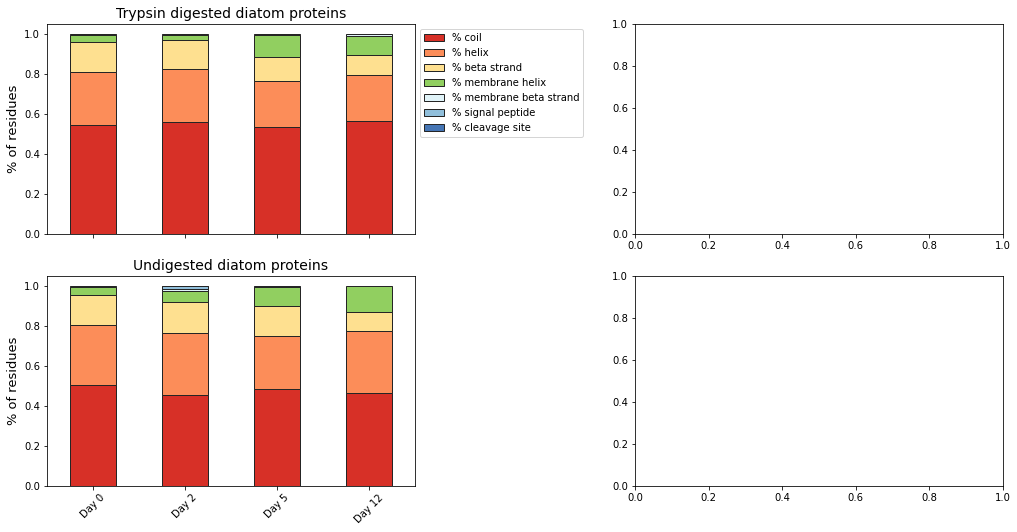

In [50]:
# plot secondary structure predictions

colors = '#d73027', '#fc8d59', '#fee090', '#91cf60', '#e0f3f8', '#91bfdb', '#4575b4'


fig, axes = plt.subplots(figsize=(14, 7),nrows=2, ncols=2)
plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace= 0.6, hspace= 0.20)

PeaksDB_Proteus_trypsin.plot(ax=axes[0,0], kind='bar', stacked=True, \
                             color = colors, edgecolor = '#252525')

PeaksDB_Proteus_undig.plot(ax=axes[1,0], kind='bar', stacked=True, \
                           color = colors, edgecolor = '#252525')

axes[0,0].set_title('Trypsin digested diatom proteins', fontsize = 14)
axes[0,0].set_ylabel("% of residues", fontsize = 13)
axes[0,0].legend(bbox_to_anchor=(1,1), loc="upper left")
axes[0,0].set_xticklabels( ('', '','', ''), rotation = 45)

axes[1,0].set_title('Undigested diatom proteins', fontsize = 14)
axes[1,0].set_ylabel("% of residues", fontsize = 13)
axes[1,0].get_legend().remove()
axes[1,0].set_xticklabels(('Day 0', 'Day 2','Day 5', 'Day 12'), rotation = 45)